In [18]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

In [3]:
tn_movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [4]:
#making a new df 'Money Metrics'
money_metrics_df = tn_movie_budgets_df

# cleaning budget and gross
# debug this later, but, maybe come back
def clean_a_money_column(df, series_title):
    df[series_title] = df[series_title].str.replace('$','')
    df[series_title] = df[series_title].str.replace(',','')
    df[series_title] = pd.to_numeric(df[series_title])
    return df


money_metrics_df = clean_a_money_column(money_metrics_df,'worldwide_gross')
money_metrics_df = clean_a_money_column(money_metrics_df,'domestic_gross')
money_metrics_df = clean_a_money_column(money_metrics_df,'production_budget')
#clean off dollars
#money_metrics_df['worldwide_gross'] = money_metrics_df['worldwide_gross'].str.replace('$', '')
#clear off commas
#money_metrics_df['worldwide_gross'] = money_metrics_df['worldwide_gross'].str.replace(',', '')
#money_metrics_df.info()

### Repeat for other money columns

#money_metrics_df['production_budget'] = money_metrics_df['production_budget'].str.replace('$', '')
#money_metrics_df['production_budget'] = money_metrics_df['production_budget'].str.replace(',', '')
#money_metrics_df['domestic_gross'] = money_metrics_df['domestic_gross'].str.replace('$', '')
#money_metrics_df['domestic_gross'] = money_metrics_df['domestic_gross'].str.replace(',', '')


#### FUCK YEAH FUNCTIONS

In [5]:
money_metrics_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [5]:
#test that it worked
print(money_metrics_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB
None


In [6]:
#Money metrics from lecture

#Profit Margin (PM): 
#revenue earned minus the cost divided by revenue; profit/revenue
#Return on Investment (ROI): 
#ratio between net profit and cost; net profit/cost

#assuming gross equals revenue, production budget = cost
money_metrics_df['Profit Margin']= (money_metrics_df['worldwide_gross']-money_metrics_df['production_budget'])/money_metrics_df['worldwide_gross']
money_metrics_df['ROI'] = (money_metrics_df['worldwide_gross']/money_metrics_df['production_budget'])

In [7]:
money_metrics_df


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profit Margin,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,0.846921,6.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,0.607331,2.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-1.337036,0.427892
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,0.764364,4.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,0.759251,4.153696
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-inf,0.000000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,0.975051,40.082500
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-2.736921,0.267600
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-inf,0.000000


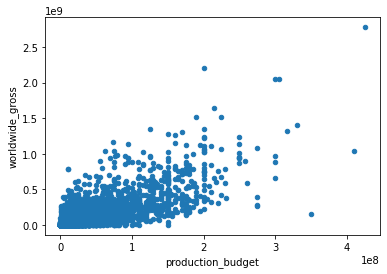

In [8]:
money_metrics_df.plot('production_budget' , 'worldwide_gross',  kind = 'scatter');

#plotting to test

In [9]:
money_metrics_df.sort_values(['Profit Margin'], ascending=False).head(40)
#Looks good!

#setting profit margin desc as order for the table
money_metrics_df=money_metrics_df.sort_values(['Profit Margin'], ascending=False)

In [26]:
money_metrics_df['Year'] = money_metrics_df['release_date']
money_metrics_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profit Margin,ROI,Year,Month
5745,46,"Jun 30, 1972",Deep Throat,25000,45000000,45000000,0.999444,1800.000000,"Jun 30, 1972",Jun
5613,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,0.997995,498.750000,"Mar 21, 1980",Mar
5492,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,0.997683,431.517853,"Sep 25, 2009",Sep
5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,0.997599,416.564740,"Jul 10, 2015",Jul
5406,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,0.997584,413.833333,"Jul 14, 1999",Jul
...,...,...,...,...,...,...,...,...,...,...
5522,23,"Dec 31, 2014",Pancakes,400000,0,0,-inf,0.000000,"Dec 31, 2014",Dec
5521,22,"Nov 4, 2005",Show Me,400000,0,0,-inf,0.000000,"Nov 4, 2005",Nov
5520,21,"Apr 1, 1986",My Beautiful Laundrette,400000,0,0,-inf,0.000000,"Apr 1, 1986",Apr
5116,17,"Sep 8, 2015",Checkmate,1500000,0,0,-inf,0.000000,"Sep 8, 2015",Sep


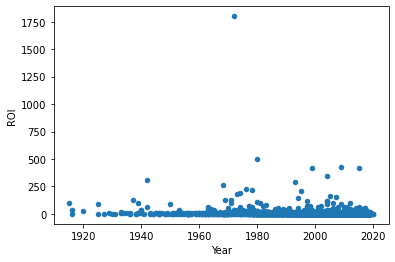

In [69]:
#Let's try year vs. ROI, see if there was a particularly good year to be making movies.
money_metrics_df.plot('Year' , 'ROI',  kind = 'scatter');
#Looks like we've got a lot of outliers here, and a big chunk sitting on the bottom! We may want to graph only the main body of the bell curve here. 

In [67]:
#Vu's magic lambda, plus to numeric on the year 
money_metrics_df['Year'] = pd.to_numeric(money_metrics_df['release_date'].map(lambda x: x[-4:]))
money_metrics_df['Month'] = money_metrics_df['release_date'].map(lambda x: x[:3])


In [52]:
money_metrics_df['Year'].min()

1915

In [47]:
#functions to pull years, months out of the data set. Can also be used for other column types?
#for now, use int types for the year
def year_iso (df, year):
    output_df = df[df['Year'] == year]
    return output_df
#for now, with money_metrics_df, use three letter abreviations for months
def month_iso (df, month):
    output_df = df[df['Month'] == month]
    return output_df


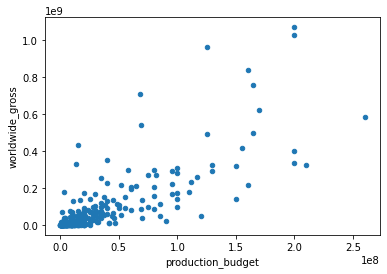

In [49]:
#Test, just grabbing 2010 and plotting it
mmdf_2010 = year_iso(money_metrics_df, 2010)

mmdf_2010.plot('production_budget' , 'worldwide_gross',  kind = 'scatter');



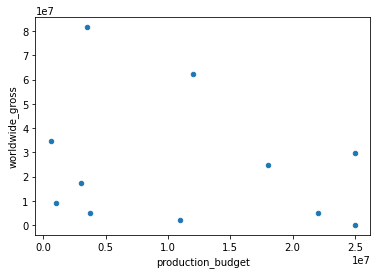

In [50]:
#Now grabbing 1970 for comparison
mmdf_1970 = year_iso(money_metrics_df, 1970)

mmdf_1970.plot('production_budget' , 'worldwide_gross',  kind = 'scatter');

In [70]:
#Automating year pull outs on money_metrics_df, not sure the best way to do this, but for now, list of dataframes?
year_range = list(range(1915,2021))
year_range
year_keys = []
for i in year_range:
    keystring = ''
    keystring = str(i) + ' money_metric_df'
    year_keys.append(keystring)

list_of_dfs_years = []
for i in year_range:
    df_out = year_iso (money_metrics_df, i)
    list_of_dfs_years.append(df_out)
    
years_and_dfs = dict(zip(year_keys,list_of_dfs_years))

years_and_dfs['2019 money_metric_df']
#okay, now we just gotta join things

years_and_dfs.keys()

dict_keys(['1915 money_metric_df', '1916 money_metric_df', '1917 money_metric_df', '1918 money_metric_df', '1919 money_metric_df', '1920 money_metric_df', '1921 money_metric_df', '1922 money_metric_df', '1923 money_metric_df', '1924 money_metric_df', '1925 money_metric_df', '1926 money_metric_df', '1927 money_metric_df', '1928 money_metric_df', '1929 money_metric_df', '1930 money_metric_df', '1931 money_metric_df', '1932 money_metric_df', '1933 money_metric_df', '1934 money_metric_df', '1935 money_metric_df', '1936 money_metric_df', '1937 money_metric_df', '1938 money_metric_df', '1939 money_metric_df', '1940 money_metric_df', '1941 money_metric_df', '1942 money_metric_df', '1943 money_metric_df', '1944 money_metric_df', '1945 money_metric_df', '1946 money_metric_df', '1947 money_metric_df', '1948 money_metric_df', '1949 money_metric_df', '1950 money_metric_df', '1951 money_metric_df', '1952 money_metric_df', '1953 money_metric_df', '1954 money_metric_df', '1955 money_metric_df', '1956

In [ ]:
#next goal, make a graph comparing two data sets. In this case, 